# Bilddaten öffnen

Die erste Wahl für das Öffnen von Bilddaten ist die [scikit-image](https://scikit-image.org) Bibliothek. Sie bietet zwei Funktionen, `imread` und `imshow`, zum Lesen und Visualisieren von Bilddaten. Sie verarbeitet verschiedene Dateiformate wie `.tif`. Wenn sie Ihre Bilddaten nicht richtig öffnen kann, müssen Sie nach angepassten Lösungen suchen.

In [1]:
from skimage.io import imread, imshow
import numpy as np

In [2]:
image = imread('../../data/blobs.tif')
image.shape

(254, 256)

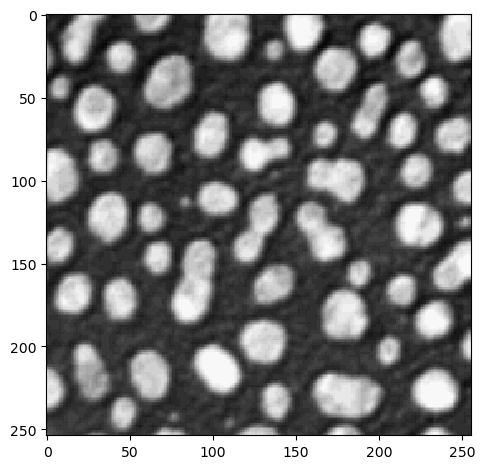

In [3]:
imshow(image)

## Metadaten lesen

Bei der Verarbeitung von Mikroskopie-Bilddaten ist es sehr wichtig, die Voxelgröße der Bilddaten zu berücksichtigen. Insbesondere wenn Volumina in Kubikmikrometern berechnet werden sollen, ist es entscheidend zu wissen, wie groß ein Voxel in X, Y und Z ist.

In [4]:
filename = "../../data/EM_C_6_c0.tif"

image_3d = imread(filename)
image_3d.shape

(256, 256, 256)

Die folgende Hilfsfunktion wurde für ImageJ-Tif-Bilder geschrieben. Sie ermöglicht es uns, die Voxelgröße aus den Metadaten der TIF-Datei zu lesen. [Quelle](https://github.com/napari/napari/issues/5165#issuecomment-1268525176).

In [5]:
def get_voxel_size_from_imagej_tiff(filename):
    """ Opens the metadata of a tiff file and returns the voxels size as (z,y,x)"""
    from PIL import Image
    from PIL.ExifTags import TAGS

    # format the meta data so that we can read it easily
    with Image.open(filename) as img:
        meta_dict = {}
        for key in img.tag.keys():
            if key in TAGS.keys():
                meta_dict[TAGS[key]] = img.tag[key]
                
    # read out voxel size from meta data
    z = [w[8:] for w in meta_dict['ImageDescription'][0].split("\n") if w.startswith('spacing')]
    x = 1/ (meta_dict["XResolution"][0][0]/meta_dict["XResolution"][0][1])
    y = 1/ (meta_dict["YResolution"][0][0]/meta_dict["YResolution"][0][1])

    return float(z[0]), float("%.4f" % y), float("%.4f" % x)

In [6]:
get_voxel_size_from_imagej_tiff(filename)

(0.16784672897196262, 0.1678, 0.1678)